In [1]:
!pip install tensorflow-cpu pandas np_utils scikit-learn keras matplotlib

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

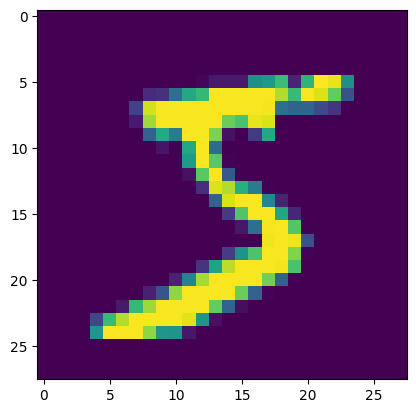

In [4]:
plt.imshow(train_images[0])

In [5]:
train_images.shape

(60000, 28, 28)

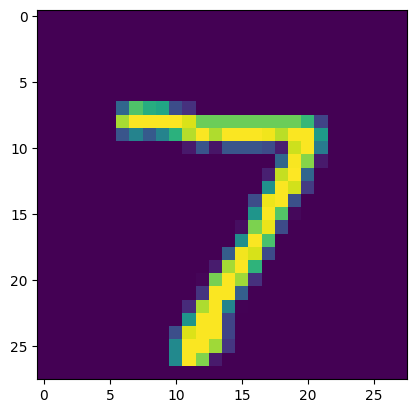

In [6]:
plt.imshow(test_images[0])

In [7]:
train_images, test_images = train_images/255.0, test_images/255.0

In [10]:
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28,1)

In [12]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
train_labels = to_categorical(train_labels)

In [15]:
test_labels = to_categorical(test_labels)

In [16]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [18]:
cnn = Sequential()
cnn.add(Conv2D(32,(3,3), activation = "relu", input_shape=(28,28,1)))
cnn.add(tf.keras.layers.MaxPooling2D(2,2))
cnn.add(Conv2D(64,(2,2), activation = "relu"))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(10, activation="softmax"))

In [21]:
cnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [22]:
cnn.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9086 - loss: 0.3113
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9834 - loss: 0.0545
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9886 - loss: 0.0363


In [25]:
predict = cnn.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [26]:
for i in range (3):
    print(predict[i],"  ",test_labels[i])

[4.1477075e-10 6.3960508e-09 8.2103945e-08 7.1219739e-07 9.1990066e-13
 4.9972505e-11 2.0347162e-16 9.9999917e-01 9.0518260e-10 1.0342722e-08]    [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[1.33316149e-07 5.98776410e-07 9.99987721e-01 3.54909124e-09
 2.18777969e-12 7.00961025e-11 1.12069965e-05 1.59015216e-12
 2.85293652e-07 6.94249302e-12]    [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[5.2986076e-07 9.9974602e-01 1.0418241e-04 1.2195996e-07 1.6843769e-05
 1.9982019e-06 1.4201167e-06 3.1557513e-06 1.2543415e-04 2.2926145e-07]    [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [27]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        92,170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 302,240 (1.15 MB)

 Trainable params: 100,746 (393.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 201,494 (787.09 KB)